Emma Klemets, Sept 2022   
Diagrams of the reference coordinates points, and the regions mapped this fall.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import sys, os

## Measurements by Tony Hessels for holes to be used as reference for the new mapping


In [2]:
# points_Cycl_center = points_Cycl_center.T
# MSR_CENTER = np.array([34527.4688, 2890.5609, -1362.6374]) #mm [x,y,z]

NameArr = ['Point Name', 'x original', 'y original', 'z original', 'x MSR', 'y MSR', 'z MSR']

# measuments in mm
basePoints = pd.read_csv('Plate Hole Locations.csv', skiprows=3, usecols=[0,2,3,4,6,7,8], 
                         names=NameArr, index_col='Point Name')
basePoints = basePoints[basePoints.index.notnull()]

basePoints.loc[['L (G)', 'L (R)']]

basePoints = basePoints.rename(index={'MSR center (on ground)': 'MSR center'})

In [3]:
# basePoints

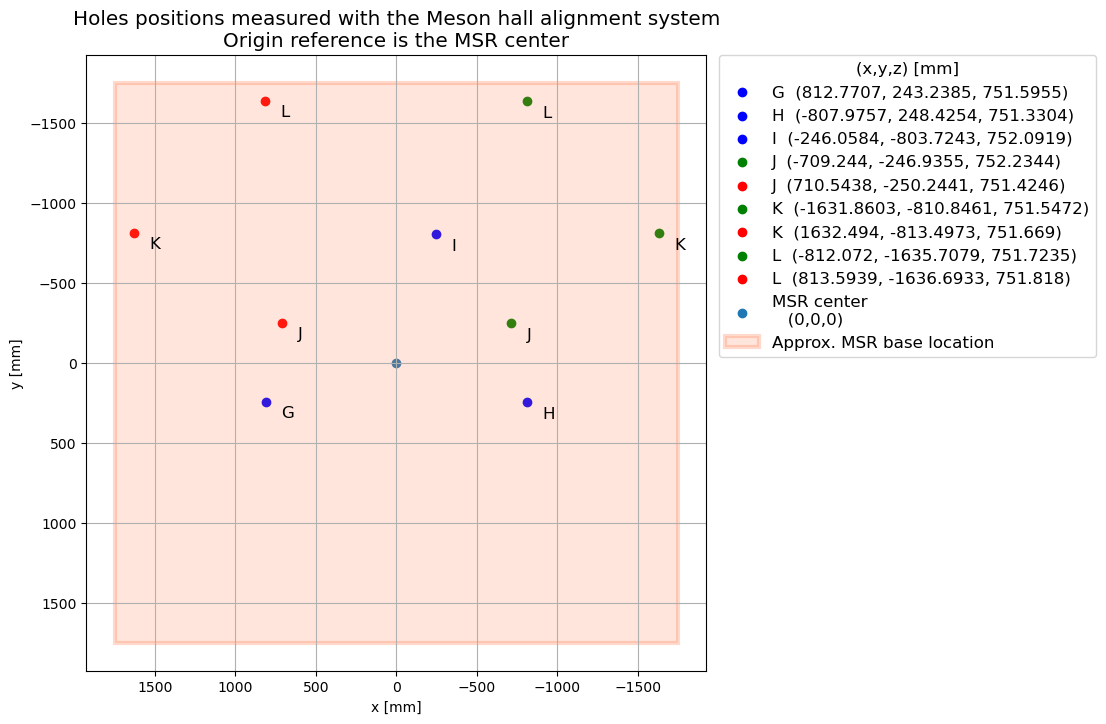

In [4]:
fig, ax = plt.subplots(figsize=(8,8))
txtshx = -0.1*1000
txtshy = 0.1*1000
plt.rcParams.update({'font.size': 12})

# plt.scatter(points_Cycl_center[0], points_Cycl_center[1])
for i, txt in enumerate(basePoints.index[:-2]):
#     print(txt[-2])
    if txt[-2]=='B':
        c= 'blue'
    elif txt[-2]=='R':
        c= 'red'
    elif txt[-2]=='G':
        c= 'green'
        
    plt.scatter(basePoints.loc[txt][3], basePoints.loc[txt][4], color=c, 
        label=txt[:2]+ f" ({basePoints.loc[txt][3]}, {basePoints.loc[txt][4]}, {basePoints.loc[txt][5]})")
    ax.annotate(txt[:2], # f" ({points_Cycl_center[0][i]:.3}, {points_Cycl_center[1][i]:.3})", \
                (basePoints.loc[txt][3], basePoints.loc[txt][4]), 
                xytext=(basePoints.loc[txt][3]+txtshx, basePoints.loc[txt][4]+txtshy))

# MSR_shift = -51.67/100 #m
ax.scatter(basePoints.loc['MSR center'][3], basePoints.loc['MSR center'][4], label=f"MSR center\n   (0,0,0)")

# ax.annotate(f'MSR center', # \n({MSR_CENTER[0]:.4},{MSR_CENTER[1]:.4})', 
#             (MSR_CENTER[0]+txtshx-0.25, MSR_CENTER[1]+txtshy))

# Create a Rectangle patch
sideLength = 3.5*1000 #mm
rect = patches.Rectangle((-sideLength/2+basePoints.loc['MSR center'][3], -sideLength/2+basePoints.loc['MSR center'][4]), 
            sideLength, sideLength, linewidth=3, edgecolor='orangered', facecolor='coral', alpha=0.2,
                         label="Approx. MSR base location")
# ax.annotate('Approx. MSR placement', (-1.6, 1.8))

# Add the patch to the Axes
ax.add_patch(rect)
ax.set_title("Holes positions measured with the Meson hall alignment system"+
             "\nOrigin reference is the MSR center")

# Lx = basePoints.loc['L (R)']
# xlim = [-1400, Lx[3]+500]
# ylim = [Lx[4]-100, 1600]
# axis_rangex = np.arange(xlim[0], xlim[1], 400)
# axis_rangey = np.arange(ylim[0], ylim[1], 400)
# ax.set_xticks(axis_rangex)
# ax.set_yticks(axis_rangey)

plt.legend(title="(x,y,z) [mm]", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.set_xlabel("x [mm]")
ax.set_ylabel("y [mm]")

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()


plt.grid()
# print(38000 - 32500)
# print(4800 - 0)
#setting limits to get a square grid
# ax.set_xlim(xlim[0], xlim[1])
# ax.set_ylim(ylim[0], ylim[1])
plt.savefig('plots/holePositions.pdf', bbox_inches='tight')#, dpi=100)

plt.show()

In [5]:
#using L as origin

In [6]:
#quick math as we set up

In [7]:
toply = 124.5 #cm
ply=1.8

toBase=toply+ply
toBase

126.3

In [8]:
Mark_130 = toBase+1.1
Mark_130

127.39999999999999

## what we actually mapped

In [33]:
colNames = ['x', 'y', 'z','B_x', 'B_y', 'B_z']

#the properly orientated data
file_22 = "data_export/map_referencedMSR_fall2022_seperate_interp50.txt"
data_22 = pd.read_csv(file_22, comment='#', sep='\t', names=colNames)

file_22_together = "data_export/map_referencedMSR_fall2022_together_interp50.txt"
data_22_together = pd.read_csv(file_22_together, comment='#', sep='\t', names=colNames)

file_19 = "../MagMapping-export_TH_2019/data_export/map_referencedMSR_interp50.txt"
data_19 = pd.read_csv(file_19, comment='#', sep='\t', names=colNames)

In [34]:
#seperate into red and green data
sep = -35 #cm
data_22_red = data_22[data_22['x'] > sep]
data_22_green = data_22[data_22['x'] < sep]

minY_22_red = np.min(data_22_red['y'])
maxY_22_red = np.max(data_22_red['y'])

minY_22_green = np.min(data_22_green['y'])
maxY_22_green = np.max(data_22_green['y'])


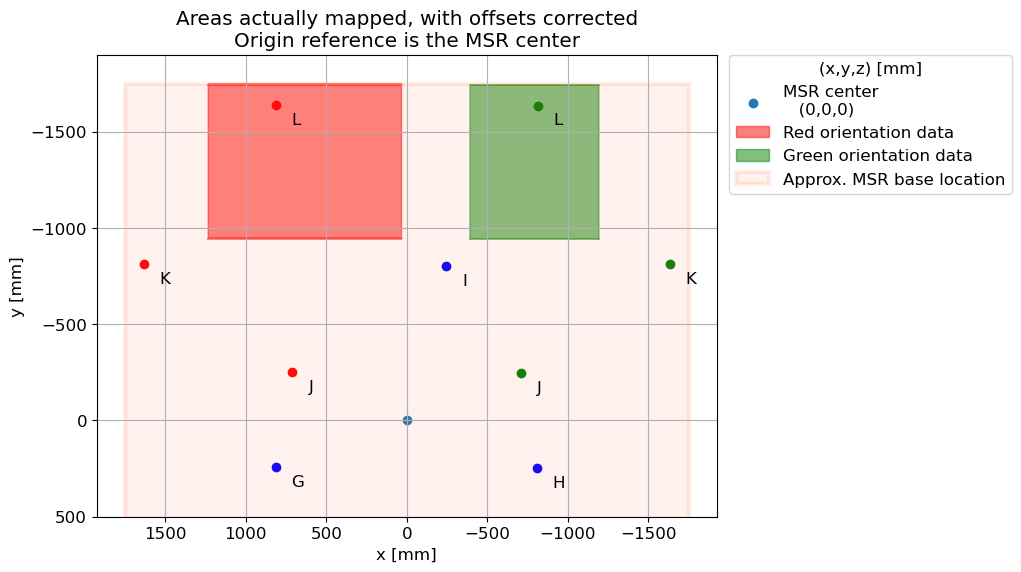

In [35]:
fig, ax = plt.subplots(figsize=(8,6))
txtshx = -0.1*1000
txtshy = 0.1*1000
plt.rcParams.update({'font.size': 12})

for i, txt in enumerate(basePoints.index[:-2]):
    if txt[-2]=='B':
        c= 'blue'
    elif txt[-2]=='R':
        c= 'red'
    elif txt[-2]=='G':
        c= 'green'
        
    plt.scatter(basePoints.loc[txt][3], basePoints.loc[txt][4], color=c)#, 
    ax.annotate(txt[:2],
                (basePoints.loc[txt][3], basePoints.loc[txt][4]), 
                xytext=(basePoints.loc[txt][3]+txtshx, basePoints.loc[txt][4]+txtshy))

ax.scatter(basePoints.loc['MSR center'][3], basePoints.loc['MSR center'][4], label=f"MSR center\n   (0,0,0)")


ax.fill_between(data_22_red['x']*10, minY_22_red*10, maxY_22_red*10, color='r',alpha=.5, label='Red orientation data')
ax.fill_between(data_22_green['x']*10, minY_22_green*10, maxY_22_green*10, color='g',alpha=.5, label='Green orientation data')


# Create a Rectangle patch
sideLength = 3.5*1000 #mm
rect = patches.Rectangle((-sideLength/2+basePoints.loc['MSR center'][3], -sideLength/2+basePoints.loc['MSR center'][4]), 
            sideLength, sideLength, linewidth=3, edgecolor='orangered', facecolor='coral', alpha=0.1, label="Approx. MSR base location")

# Add the patch to the Axes
ax.add_patch(rect)
ax.set_title("Areas actually mapped, with offsets corrected"+
             "\nOrigin reference is the MSR center")

plt.legend(title="(x,y,z) [mm]", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.set_xlabel("x [mm]")
ax.set_ylabel("y [mm]")

ax.set_ylim(-1900, 500)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.grid()

plt.savefig('plots/mappedPositions.pdf', bbox_inches='tight')


plt.show()

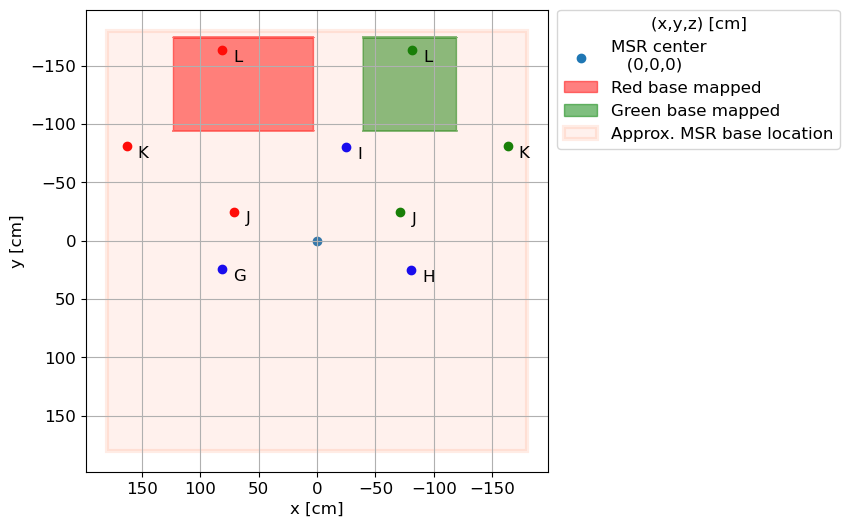

In [24]:
fig, ax = plt.subplots(figsize=(8,6))
txtshx = -0.1*100
txtshy = 0.1*100
plt.rcParams.update({'font.size': 12})

for i, txt in enumerate(basePoints.index[:-2]):
    if txt[-2]=='B':
        c= 'blue'
    elif txt[-2]=='R':
        c= 'red'
    elif txt[-2]=='G':
        c= 'green'
        
    plt.scatter(basePoints.loc[txt][3]/10, basePoints.loc[txt][4]/10, color=c)#, 
    ax.annotate(txt[:2],
                (basePoints.loc[txt][3]/10, basePoints.loc[txt][4]/10), 
                xytext=(basePoints.loc[txt][3]/10+txtshx, basePoints.loc[txt][4]/10+txtshy))

ax.scatter(basePoints.loc['MSR center'][3], basePoints.loc['MSR center'][4], label=f"MSR center\n   (0,0,0)")


ax.fill_between(data_22_red['x'], minY_22_red, maxY_22_red, color='r',alpha=.5, label='Red base mapped')
ax.fill_between(data_22_green['x'], minY_22_green, maxY_22_green, color='g',alpha=.5, label='Green base mapped')


# Create a Rectangle patch
sideLength = 3.6*100 #cm
rect = patches.Rectangle((-sideLength/2+basePoints.loc['MSR center'][3], -sideLength/2+basePoints.loc['MSR center'][4]), 
            sideLength, sideLength, linewidth=3, edgecolor='orangered', facecolor='coral', alpha=0.1, label="Approx. MSR base location")

# Add the patch to the Axes
ax.add_patch(rect)
# ax.set_title("Areas actually mapped, with offsets corrected"+
             # "\nOrigin reference is the MSR center")

plt.legend(title="(x,y,z) [cm]", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.grid()
plt.gca().set_aspect("equal")

# plt.savefig('plots/mappedPositions.pdf', bbox_inches='tight')
plt.savefig('plots/mappedPositions_square.png', bbox_inches='tight')


plt.show()

In [37]:
# print("2019 limits:")
mins_19 = np.min(data_19)
max_19 = np.max(data_19)

# print("2022 limits:")
mins_22 = np.min(data_22_together)
max_22 = np.max(data_22_together)

whichMin = mins_19 > mins_22
whichMax = max_19 < max_22

minsAll = mins_19[whichMin].append(mins_22[~whichMin])
maxsAll = max_19[whichMax].append(max_22[~whichMax])

# print("mins:", minsAll)
# print("max:", maxsAll)

print(  f"x_min, x_max = {minsAll['x']}, {maxsAll['x']} \n" +
        f"y_min, y_max = {minsAll['y']}, {maxsAll['y']} \n"+
        f"z_min, z_max = {minsAll['z']}, {maxsAll['z']}")

x_min, x_max = -90.1, 123.60939 
y_min, y_max = -174.71133, -94.61279 
z_min, z_max = -150.75165, 9.257800000000003


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Emma\AppData\Local\Temp\ipykernel_30224\503440131.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  minsAll = mins_19[whichMin].append(mins_22[~whichMin])
C:\Users\Emma\AppData\Local\Temp\ipykernel_30224\503440131.py:13: FutureWarning: The series.append method is deprecat

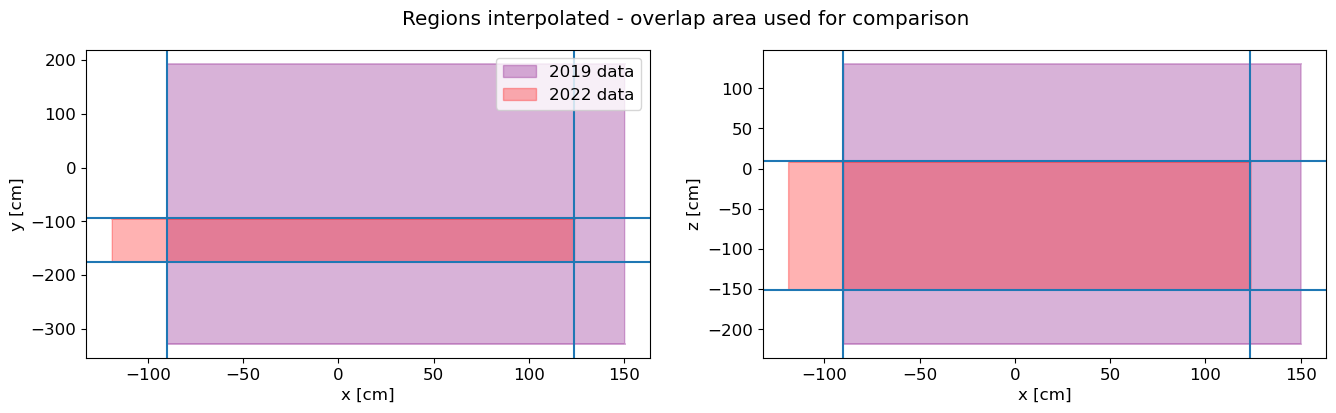

In [60]:
%matplotlib inline

x_min, x_max = -90.1, 123.60939 
y_min, y_max = -174.71133, -94.61279 
z_min, z_max = -150.75165, 9.257800000000003

fig, axs = plt.subplots(1, 2, figsize=(16,4))
plt.suptitle("Regions interpolated - overlap area used for comparison")

minY_19 = np.min(data_19['y'])
maxY_19 = np.max(data_19['y'])
minY_22 = np.min(data_22_together['y'])
maxY_22 = np.max(data_22_together['y'])

axs[0].fill_between(data_19['x'], minY_19, maxY_19, color='purple',alpha=.3, label='2019 data')
axs[0].fill_between(data_22_together['x'], minY_22, maxY_22, color='r',alpha=.3, label='2022 data')

axs[0].axvline(x_min)
axs[0].axvline(x_max)
axs[0].axhline(y_min)
axs[0].axhline(y_max)


axs[0].set_xlabel('x [cm]')
axs[0].set_ylabel('y [cm]')
axs[0].legend(loc=1)

minZ_19 = np.min(data_19['z'])
maxZ_19 = np.max(data_19['z'])
minZ_22 = np.min(data_22_together['z'])
maxZ_22 = np.max(data_22_together['z'])

axs[1].fill_between(data_19['x'], minZ_19, maxZ_19, color='purple',alpha=.3)
axs[1].fill_between(data_22_together['x'], minZ_22, maxZ_22, color='r',alpha=.3)

axs[1].axvline(x_min)
axs[1].axvline(x_max)
axs[1].axhline(z_min)
axs[1].axhline(z_max)

axs[1].set_xlabel('x [cm]')
axs[1].set_ylabel('z [cm]')

plt.show()

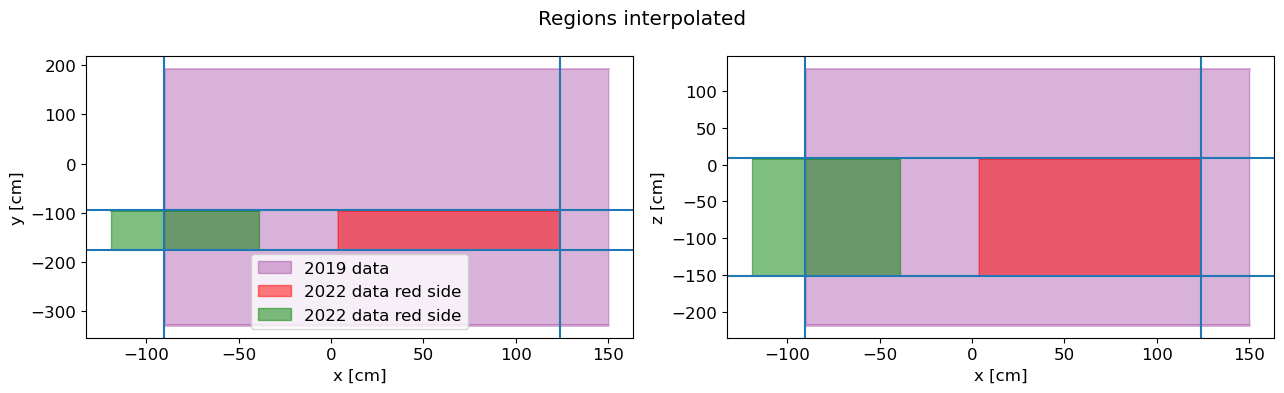

In [57]:
%matplotlib inline

# file_22 = "data_export/map_referencedMSR_fall2022_together_interp50.txt"
# data_22 = pd.read_csv(file_22, comment='#', sep='\t', names=colNames)

sep = -35 #cm
data_22_red = data_22[data_22['x'] > sep]
data_22_green = data_22[data_22['x'] < sep]

minY_22_red = np.min(data_22_red['y'])
maxY_22_red = np.max(data_22_red['y'])

minY_22_green = np.min(data_22_green['y'])
maxY_22_green = np.max(data_22_green['y'])

x_min, x_max = -90.1, 123.60939 
y_min, y_max = -174.71133, -94.61279 
z_min, z_max = -150.75165, 9.257800000000003

fig, axs = plt.subplots(1, 2, figsize=(13,4))
plt.suptitle("Regions mapped")

minY_19 = np.min(data_19['y'])
maxY_19 = np.max(data_19['y'])
minY_22 = np.min(data_22['y'])
maxY_22 = np.max(data_22['y'])

axs[0].fill_between(data_19['x'], minY_19, maxY_19, color='purple',alpha=.3, label='2019 data')
axs[0].fill_between(data_22_red['x'], np.min(data_22_red['y']), 
                    np.max(data_22_red['y']), color='r',alpha=.5, label='2022 data red side')
axs[0].fill_between(data_22_green['x'], np.min(data_22_green['y']), 
                    np.max(data_22_green['y']), color='g',alpha=.5, label='2022 data red side')

axs[0].axvline(x_min)
axs[0].axvline(x_max)
axs[0].axhline(y_min)
axs[0].axhline(y_max)

axs[0].set_xlabel('x [cm]')
axs[0].set_ylabel('y [cm]')
axs[0].legend()

minZ_19 = np.min(data_19['z'])
maxZ_19 = np.max(data_19['z'])
minZ_22 = np.min(data_22['z'])
maxZ_22 = np.max(data_22['z'])

axs[1].fill_between(data_19['x'], minZ_19, maxZ_19, color='purple',alpha=.3)
axs[1].fill_between(data_22_red['x'], np.min(data_22_red['z']), np.max(data_22_red['z']), color='r',alpha=.5, label='2022 data red side')
axs[1].fill_between(data_22_green['x'], np.min(data_22_green['z']), np.max(data_22_green['z']), color='g',alpha=.5, label='2022 data red side')

axs[1].axvline(x_min)
axs[1].axvline(x_max)
axs[1].axhline(z_min)
axs[1].axhline(z_max)

axs[1].set_xlabel('x [cm]')
axs[1].set_ylabel('z [cm]')

# axs[0].set_aspect("equal")
# axs[1].set_aspect("equal")
plt.tight_layout()

plt.show()

In [62]:
#reference point used, marked on the front of the stairs, relative to center of MSS
stairFace_mark = np.array([ -955.6688,   -2621.2209,  1553.2774])/10 #cm

In [65]:
stairFace_mark[2] - 275 

-119.67226

In [66]:
stairFace_mark[2] - 275 + 120

0.3277400000000057